# Importing Relevant Libraries

In [22]:
#Import Relevant Libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import seaborn as sns


In [23]:
#Importing the Data file and creating a preview to ensure the selected file is of interest
#By default is shows 5 rows of data
raw_data = pd.read_csv("files/1.04.+Real-life+example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Cleaning data of Null values and Outliers

In [25]:
#Creating a description of files
raw_data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [26]:
#Observing the Count we can see that there are 4345 rows of items.
#Data is missing from Price, EngineV

In [27]:
#Dropping the model column as keeping Model column would create 300+ dummy variables.
raw_data = raw_data.drop(["Model"],axis = 1)

In [28]:
raw_data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [29]:
#Dealing with Missing Values
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [30]:
# As obseverved before Price and EngiveV are the only variables with missing values
# Since the missing rows are less than 5% of the total data set we can remove them without-
# depreciating the dataset.
data_Nonull = raw_data.dropna(axis = 0)
data_Nonull.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\ajayr\AppData\Local\Temp\ipykernel_9308\2694960895.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_Nonull["Price"],kde = True)
C:\Users\ajayr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


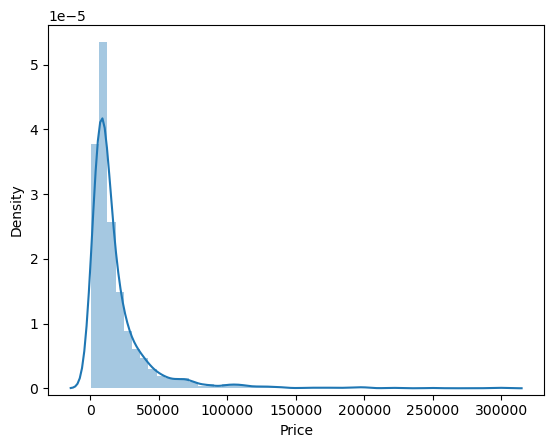

In [31]:
# Plotting the depnedent variable (Price) using sns.distplot
sns.distplot(data_Nonull["Price"],kde = True)
plt.ylim(-0.000001)
plt.show()

In [32]:
# Observed above we can see there are quite a few outliers to fix we can use the - 
# the quantile method.
q = data_Nonull["Price"].quantile(0.99)
1

1

In [33]:
# We found the 99th Percentile value with which we can remove any value more than the 
# 99th quantile
data_1 = data_Nonull[data_Nonull["Price"]<q]
data_1.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\ajayr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


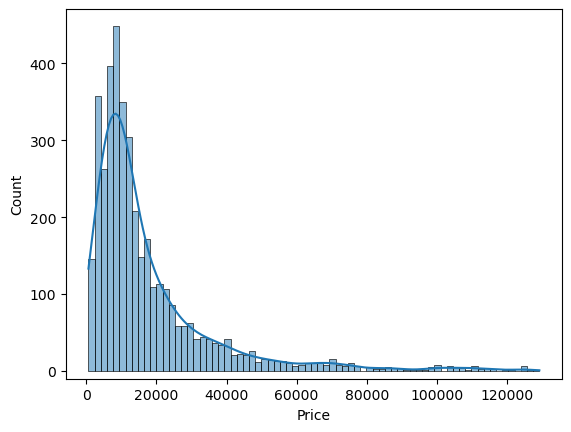

In [34]:
sns.histplot(data_1["Price"],kde = True)
plt.ylim(-10)
plt.show()

In [35]:
#Data looks better distributed compared to before cleaning Price

C:\Users\ajayr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


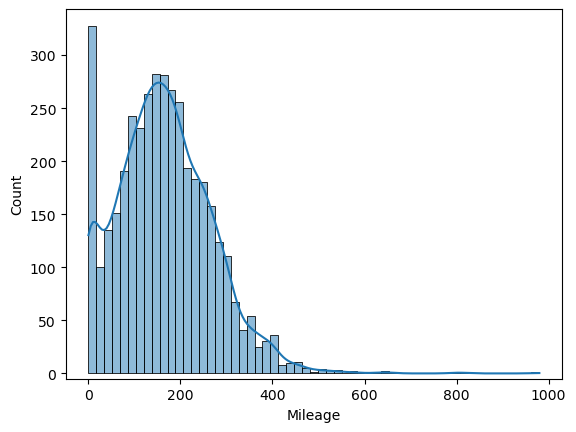

In [36]:
#Distributing Other Relevan Variables
sns.histplot(data_1["Mileage"],kde = True)
plt.ylim(-5)
plt.show()

In [37]:
# Outliers are observed and will be removed.
mq = data_1["Mileage"].quantile(.99)
data_2 = data_1[data_1["Mileage"] < mq]
data_2.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\ajayr\AppData\Local\Temp\ipykernel_9308\751744130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Mileage"],kde = True)
C:\Users\ajayr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


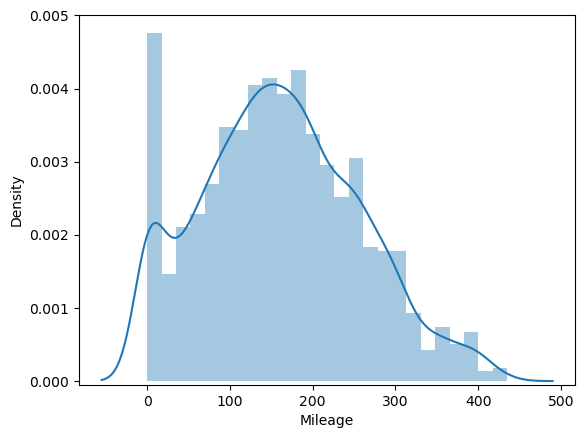

In [38]:
# Plotting the Mileage data after removing Outliers
sns.distplot(data_2["Mileage"],kde = True)
plt.ylim(-0.00005)
plt.show()

C:\Users\ajayr\AppData\Local\Temp\ipykernel_9308\3506957694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["EngineV"])
C:\Users\ajayr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


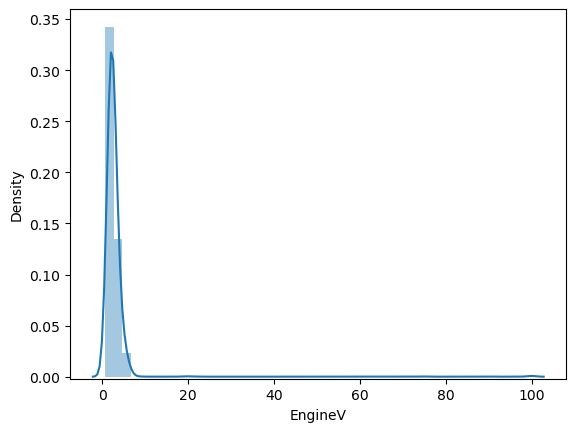

In [39]:
sns.distplot(data_2["EngineV"])
plt.ylim(-0.002)
plt.show()

In [40]:
# Plotting the data shows extreme values which are not true
# And will be cleaned as engine sizes max out around 8
data_3 = data_2[data_2["EngineV"] < 6.5]
data_3.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


C:\Users\ajayr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


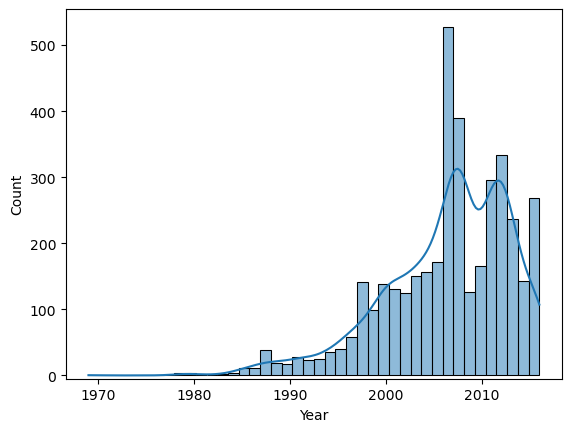

In [41]:
# Checking for year
sns.histplot(data_3["Year"],kde = True)
plt.ylim(-5)
plt.show()

In [42]:
# Removing outliers from Year 
yq = data_3["Year"].quantile(.01)
data_4 = data_3[data_3["Year"] > yq]
data_4.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


C:\Users\ajayr\AppData\Local\Temp\ipykernel_9308\3746791224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4["Year"],kde = True)
C:\Users\ajayr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


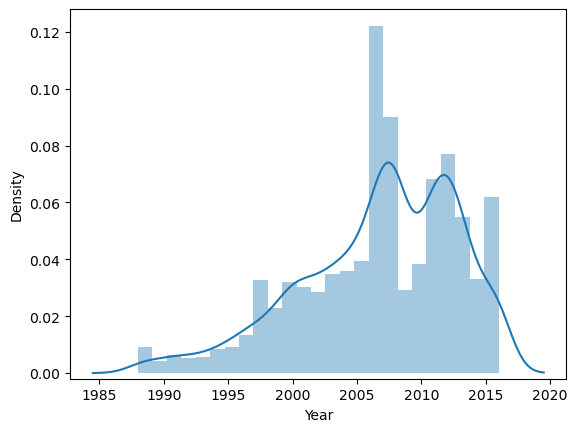

In [43]:
sns.distplot(data_4["Year"],kde = True)
plt.ylim(-0.002)
plt.show()

In [44]:
# Renaming the cleaned data and resetting index to avoid misalignment 
cleaned_data = data_4.reset_index(drop=True)
cleaned_data.describe(include= "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [45]:
# After cleaning the data we have removed 328 rows of problematic values.

# OLS Assumption

In [47]:
# Checking for linearity with relevant variables by plotting on scatter plots
# Normality is accomplished with large sample (CLT)
price = cleaned_data["Price"]
year = cleaned_data["Year"]
enginev = cleaned_data["EngineV"]
mileage = cleaned_data["Mileage"]

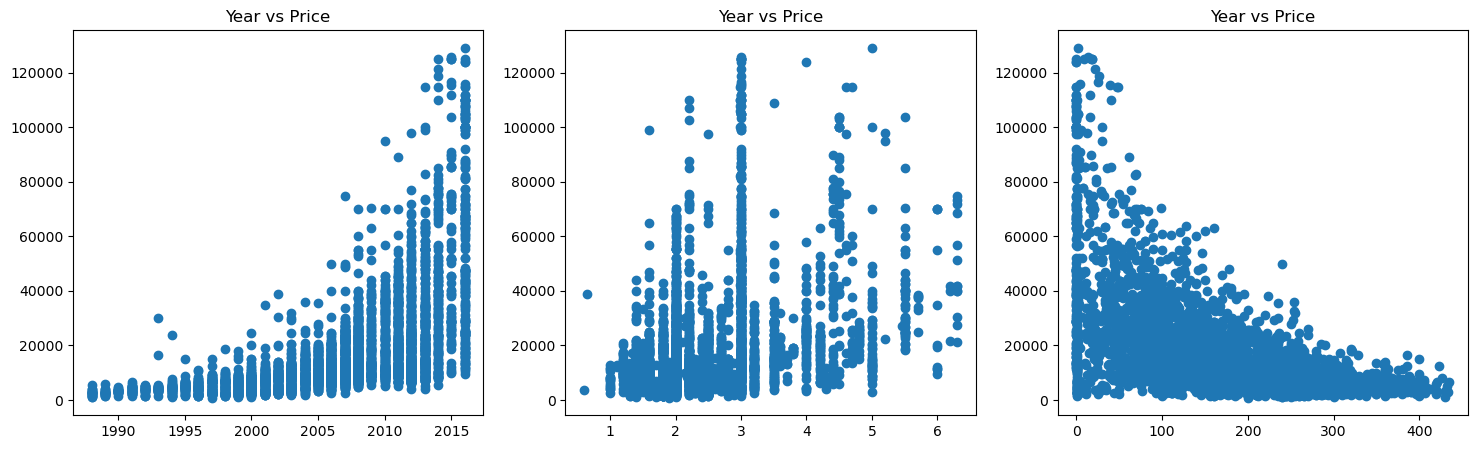

In [48]:
fig, axis = plt.subplots(1,3, figsize= (18,5))
axis[0].scatter(year,price)
axis[0].set_title("Year vs Price")

axis[1].scatter(enginev,price)
axis[1].set_title("Year vs Price")

axis[2].scatter(mileage,price)
axis[2].set_title("Year vs Price")

plt.show()

C:\Users\ajayr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

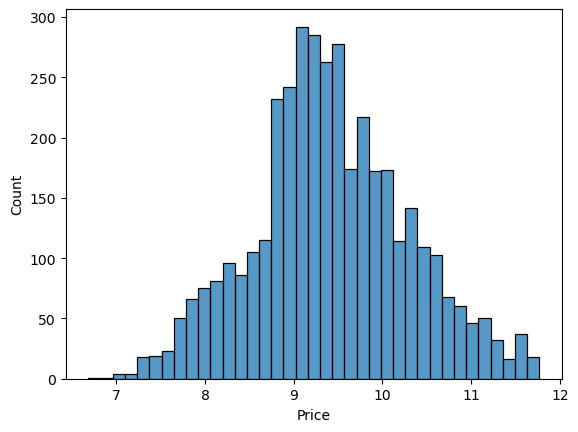

In [49]:
# As seen before Price variable is not distributed normally an is affecting 
# cont.. independent variables
# Using numpy we return the natural log of price
Log_price = np.log(price)
sns.histplot(Log_price)

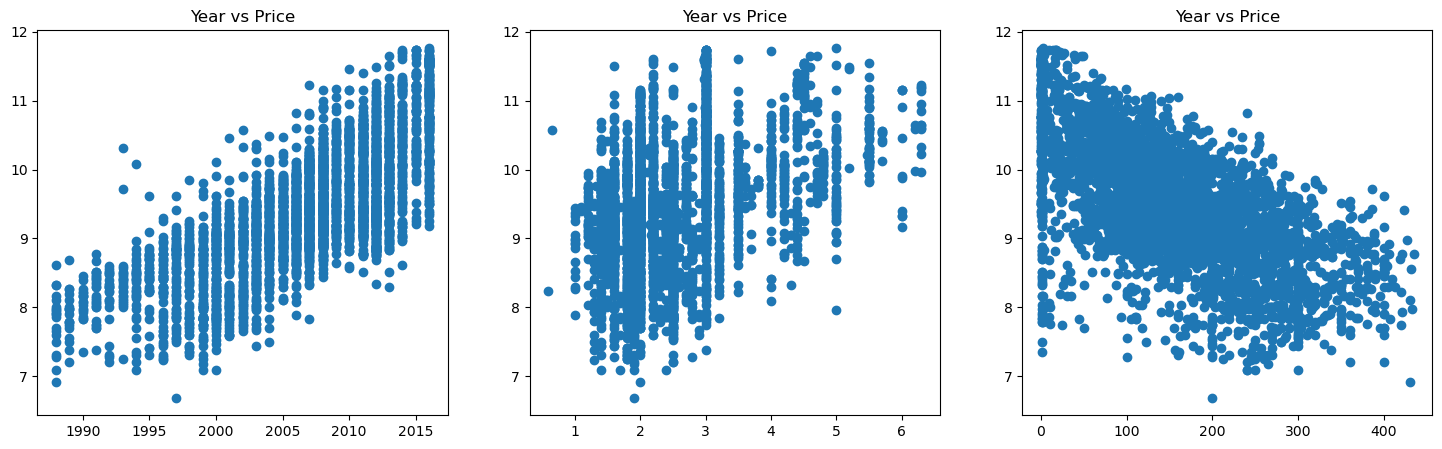

In [50]:
# We check to see if there is a difference with Log_prices
fig, axis = plt.subplots(1,3, figsize= (18,5))
axis[0].scatter(year,Log_price)
axis[0].set_title("Year vs Price")

axis[1].scatter(enginev,Log_price)
axis[1].set_title("Year vs Price")

axis[2].scatter(mileage,Log_price)
axis[2].set_title("Year vs Price")

plt.show()

In [51]:
# Better linear patterns observed, now we replace price with log price 
# Helped with homoscedasticity
cleaned_data["Log_Price"] = Log_price
cleaned_data = cleaned_data.drop(["Price"],axis = 1)
cleaned_data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


# Checking for Multicollinearity with VIF or variance inflation factor

In [53]:
# import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Relevant variables
variables = cleaned_data[["Mileage","EngineV","Year"]]
# Creating a VIF summary table.
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [55]:
# Ususally factors from 1-5 are considered normal
# But here we are only removing Year as it has significant correlation
cleaned_data = cleaned_data.drop(["Year"],axis = 1)
cleaned_data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


# Creating Dummy Variables

In [57]:
# Creating dummy variables and then dropping first categorical variable to avoid multicolinearity
# among independent variables. If we didnt drop a column we would get ∞ (infinity) for VIF values.
data_with_dummies = pd.get_dummies(cleaned_data, drop_first = True,dtype = "int")

In [58]:
# Checking the VIF values
vif_dummies = pd.DataFrame()
vif_dummies["VIF"] = [variance_inflation_factor(data_with_dummies.values,i) for i in range(data_with_dummies.shape[1])]
vif_dummies["Features"] = data_with_dummies.columns
vif_dummies

,VIF,Features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,Log_Price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


# Regression Model

In [60]:
# Reordering Table
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [61]:
columns = ['Log_Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data = data_with_dummies[columns]
data.head()

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [62]:
# Declaring targets and inputs
targets = data["Log_Price"]
inputs = data.drop(["Log_Price"],axis = 1)

In [63]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

# Train Test Split

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets,test_size =0.2, random_state = 365)

In [66]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [67]:
y_hat = reg.predict(x_train)

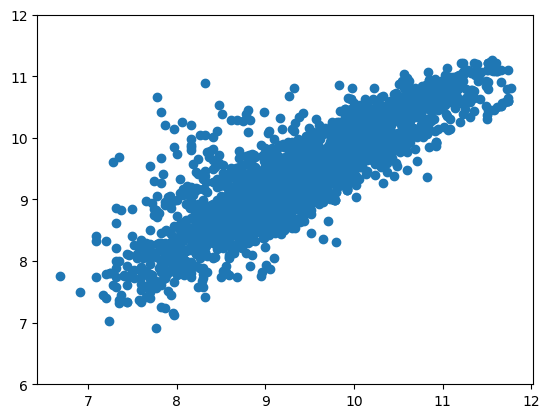

In [68]:
plt.scatter(y_train,y_hat)
plt.ylim(6,12)
plt.show()

C:\Users\ajayr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residual PDF')

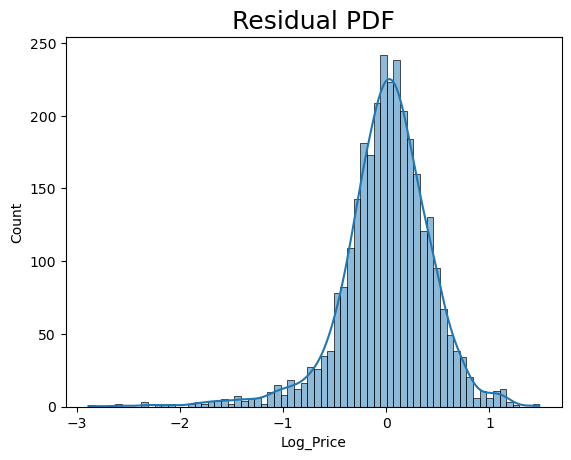

In [69]:
# Plotting a residual plot
sns.histplot(y_train-y_hat,kde = True)
plt.title("Residual PDF",size = 18)

In [70]:
# Longer tails where y_train - y_hat is lower than the mean where a higher price 
# is predicted than observed.
# Reason could be un accounted variables (accidents)
# Prediction rarely underestimates the targets

In [71]:
# calculating r score
r2 = reg.score(x_train,y_train)
r2

0.744996578792662

# Weights and Bias

In [73]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [74]:
# Seen above Mileage has the highest effect on target variable with a weight of -0.4620

# Testing

In [76]:
y_hat_test = reg.predict(x_test)

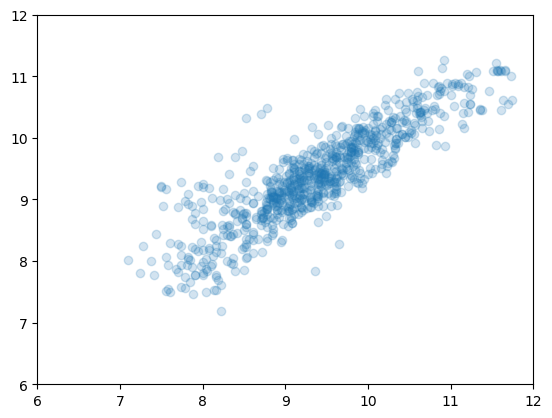

In [77]:
# Plotting predictions vs Y_test(actual Pridictions)
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.ylim(6,12)
plt.xlim(6,12)
plt.show()

In [146]:
# Creating Data Frame with predicted values
df_performance = pd.DataFrame(np.exp(y_hat_test),columns = ["Predictions"])
df_performance.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [154]:
# Creating table with both Predictions vs Actual Prices to compare
y_test = y_test.reset_index(drop = True)
# Above code removes index
df_performance["Target"] = np.exp(y_test)
df_performance.head()

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [156]:
# adding residuals to the data frame
df_performance["Residual"] = df_performance["Target"] - df_performance["Predictions"]

In [160]:
df_performance.describe()

,Predictions,Target,Residual
count,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939
std,13133.197604,19967.858908,10871.218143
min,1320.562768,1200.000000,-29456.498331
25%,7413.644234,6900.000000,-2044.191251
50%,11568.168859,11600.000000,142.518577
75%,20162.408805,20500.000000,3147.343497
max,77403.055224,126000.000000,85106.162329


In [170]:
df_performance["Diff%"] = np.absolute(df_performance["Residual"]/df_performance["Target"]*100)
df_performance.describe()

,Predictions,Target,Residual,Diff%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


# Conclution

Examining the descriptive stats of Diff%:
We can see that minimum was 0.062%, which means we were very accurate.
And the maximum being 512% entails the opposite.

Observing the percentiles we can conclude we were very close with predicting the prices.

# Whats next...

We could bring in more relevant variables, like crash history, country spec to improve the accuracy.
Could try removing more outliers which are maybe skewing the data
Try using other conversion methods.